## EDA And Feature Engineering Of Google Play Store Dataset

1) Problem statement.
Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
2) Data Collection.

The data consists of 10841 rows.

### Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis
3. Featur eEngineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### Data Cleaning Process

In [5]:
## Reviews ::

df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [6]:
df['Reviews'].astype(int)

## this wil give error....the error message is kept for better understanding...

ValueError: invalid literal for int() with base 10: '3.0M'

In [7]:
df['Reviews'].str.isnumeric().sum()

## ".isnumeric()" : This is a string method that returns True if all characters in a string are numeric (0-9), and False otherwise....

## the number of rows in the dataset were 10841 but here the output is 10840, that means one of the rows has some non-numeric 'Reviews' value...

np.int64(10840)

In [8]:
df[~df['Reviews'].str.isnumeric()]

## this will give the wanted row...

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
## creating a copy of the dataset to make changes in it...

df_copy = df.copy()

In [10]:
## dropping the 10472 index row from the copied dataset...

df_copy.drop(df_copy.index[10472],inplace=True)

In [11]:
df_copy[~df_copy['Reviews'].str.isnumeric()]  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [12]:
## converting 'Reviews' datatype to int...

df_copy['Reviews'] = df_copy['Reviews'].astype(int)

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [13]:
## now the 'Size' column has values with M and k...

df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [14]:
# there is one 'Varies with device', replacing it with 100k here...
df_copy['Size'] = df_copy['Size'].replace('Varies with device','100k')

df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', '100k', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '3.7M',
       '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M', '4.9M', '9.5M',
       '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M',
       '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M', '23k', '6.5M',
       '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M', '4.3M',
       '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M',
       '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M', '6.2M', '18k',
    

In [15]:
## creating a new size cloumn with updated integer values...
lst = []
for ekta in df_copy['Size']:
    if ekta[-1] == 'M':
        num = float(ekta[0:-1])*1000000
        lst.append(num)
    elif ekta[-1] == 'k':
        num = float(ekta[0:-1])*1000
        lst.append(num)

df_copy['Updated_Size'] = lst
df_copy['Updated_Size'] = df_copy['Updated_Size'].astype(int)

## dropping the 'Size' column...
df_copy.drop('Size',axis=1,inplace=True)

df_copy

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Updated_Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8700000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,53000000
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,3600000
10838,Parkinson Exercices FR,MEDICAL,NaN,3,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,9500000
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,100000


In [16]:
## now working on installs and price...we have to remove ',' , '+' and '$' symbols...

df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [17]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [18]:
## it could have also been done by applying .replace() as done earlier....but here it is done together which would be benificial if the dataset was huge...

chars_to_remove = [',' , '+' , '$']
cols_to_clean = ['Installs','Price']

for item in chars_to_remove:
    for col in cols_to_clean:
        df_copy[col] = df_copy[col].str.replace(item,'')

In [19]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [20]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [21]:
df_copy['Installs'] = df_copy['Installs'].astype(int)

df_copy['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: int64

In [22]:
df_copy['Price'] = df_copy['Price'].astype(float)

df_copy['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10840, dtype: float64

In [23]:
## Handling 'Last Updated'...

df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

In [24]:
df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [25]:
df_copy

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Updated_Size,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19000000,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14000000,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8700000,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25000000,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2800000,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,53000000,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,3600000,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,9500000,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,100000,19,1,2015


In [26]:
## storing the cleaned data to a new csv file...

df_copy.to_csv('cleaned_playstore_data.csv')

# "cleaned_playstore_data.csv" file will be created in the same folder...

#### EDA

In [31]:
## Exploring duplicate apps...

df_copy.duplicated('App')

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10840, dtype: bool

In [32]:
df_copy[df_copy.duplicated('App')]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Updated_Size,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,100000,26,2,2018
236,Box,BUSINESS,4.2,159872,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,100000,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,100000,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,37000000,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,100000,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,1400000,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,4000000,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,60000000,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,12000000,30,7,2018


In [33]:
df_copy[df_copy.duplicated('App')].shape

(1181, 16)

In [55]:
## Observation : The dataset has duplicate records...

## dropping duplicate apps...

df_copy.drop_duplicates(subset=['App'],keep='first')

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Updated_Size,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19000000,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14000000,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8700000,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25000000,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2800000,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,53000000,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,3600000,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,9500000,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,100000,19,1,2015


In [56]:
## finding out the number of numerical and categortical features...the features with datatype as Objects are categorical features...

numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']

## here 'O' denotes Object...

numerical_features

['Rating',
 'Reviews',
 'Installs',
 'Price',
 'Last Updated',
 'Updated_Size',
 'Day',
 'Month',
 'Year']

In [57]:
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [60]:
## proportion of count data on categorica lcolumns...

for col in categorical_features:
    print(df_copy[col].value_counts(normalize=True)*100)
    print('-------------------------------------------------------------------------')

App
ROBLOX                                                0.083026
CBS Sports App - Scores, News, Stats & Watch Live     0.073801
ESPN                                                  0.064576
Duolingo: Learn Languages Free                        0.064576
Candy Crush Saga                                      0.064576
                                                        ...   
Meet U - Get Friends for Snapchat, Kik & Instagram    0.009225
U-Report                                              0.009225
U of I Community Credit Union                         0.009225
Waiting For U Launcher Theme                          0.009225
iHoroscope - 2018 Daily Horoscope & Astrology         0.009225
Name: proportion, Length: 9659, dtype: float64
-------------------------------------------------------------------------
Category
FAMILY                 18.191882
GAME                   10.553506
TOOLS                   7.776753
MEDICAL                 4.271218
BUSINESS                4.243542
PRODUCTI

In [67]:
## proportion of count data on numerical columns...

length = len(numerical_features)

length

9

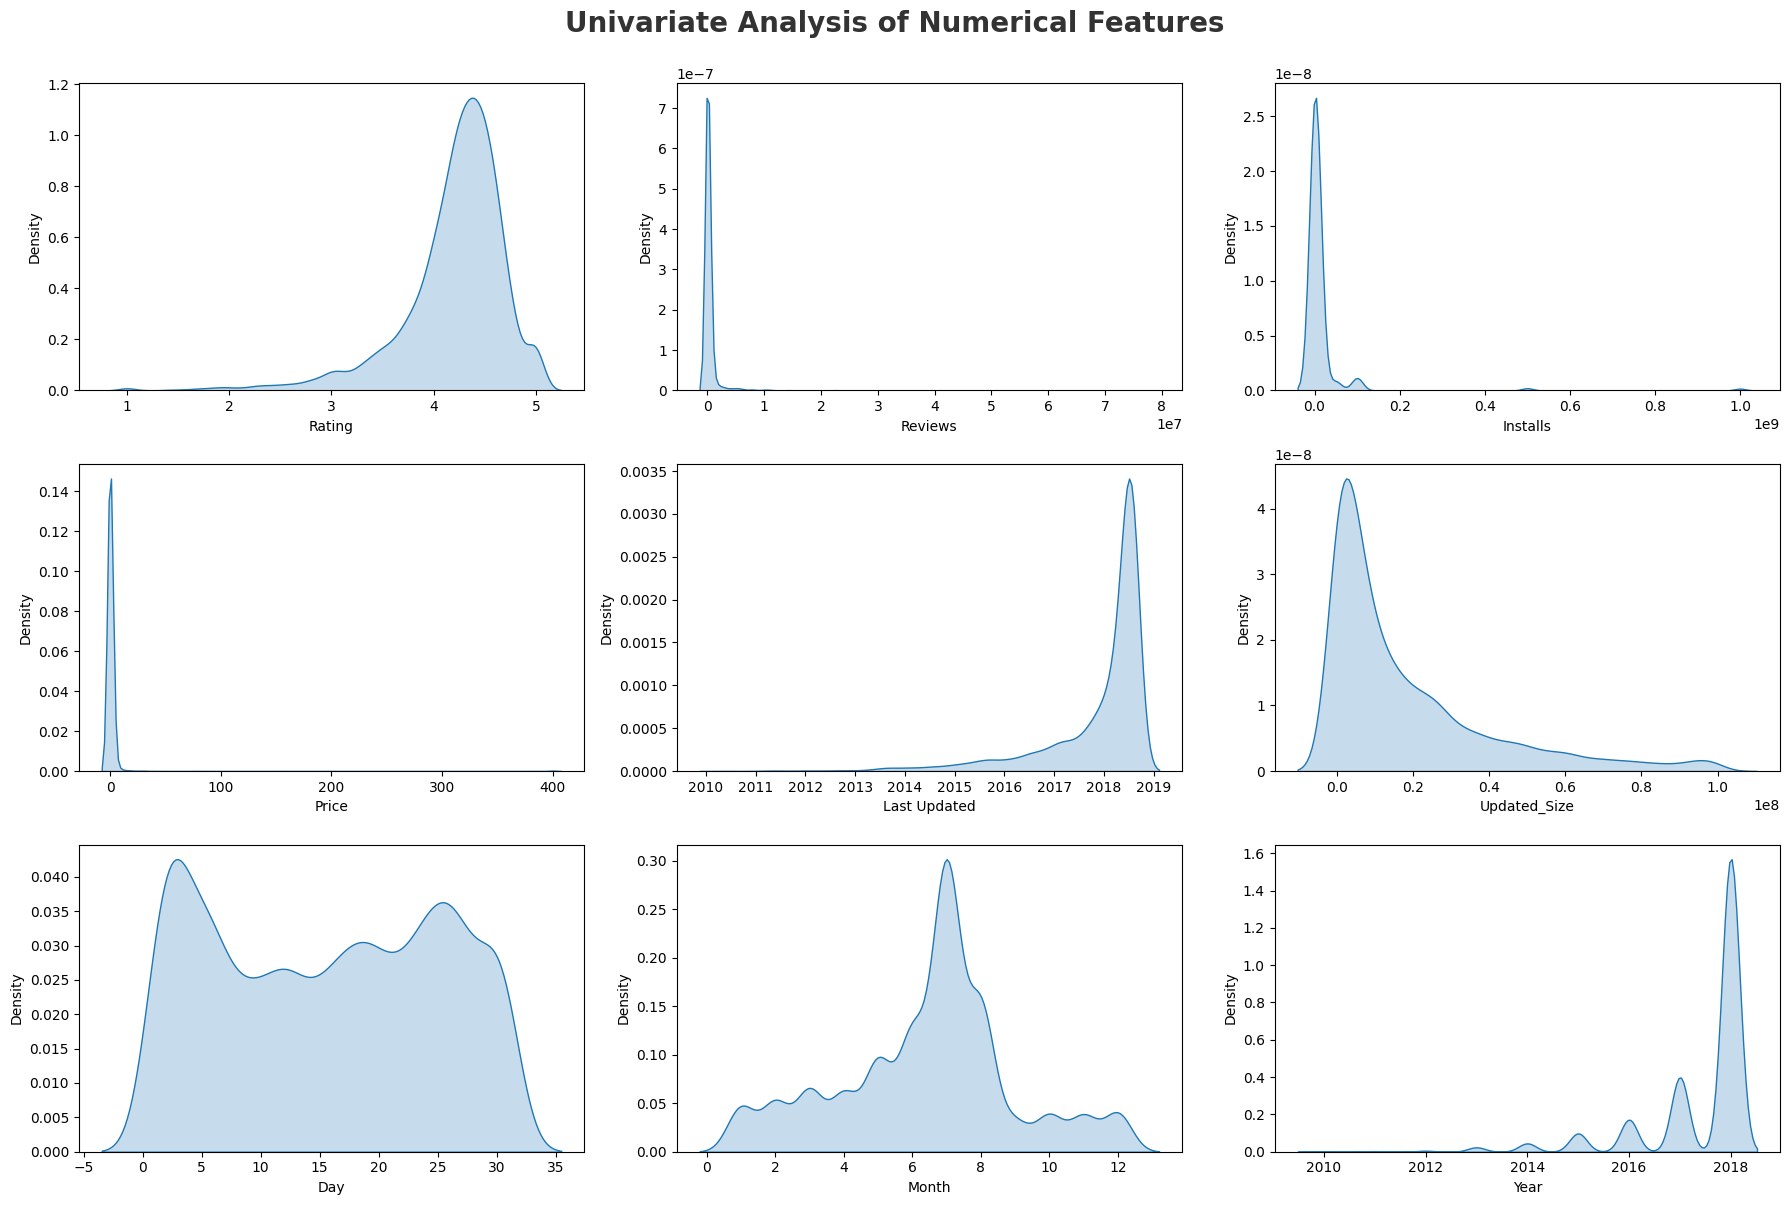

In [76]:
plt.figure(figsize=(18,12))
plt.suptitle("Univariate Analysis of Numerical Features",fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0,length):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df_copy[numerical_features[i]],shade=True)
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

#### Q1 : What is the most popular app category?

In [94]:
df_copy['Category'].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

<Axes: ylabel='count'>

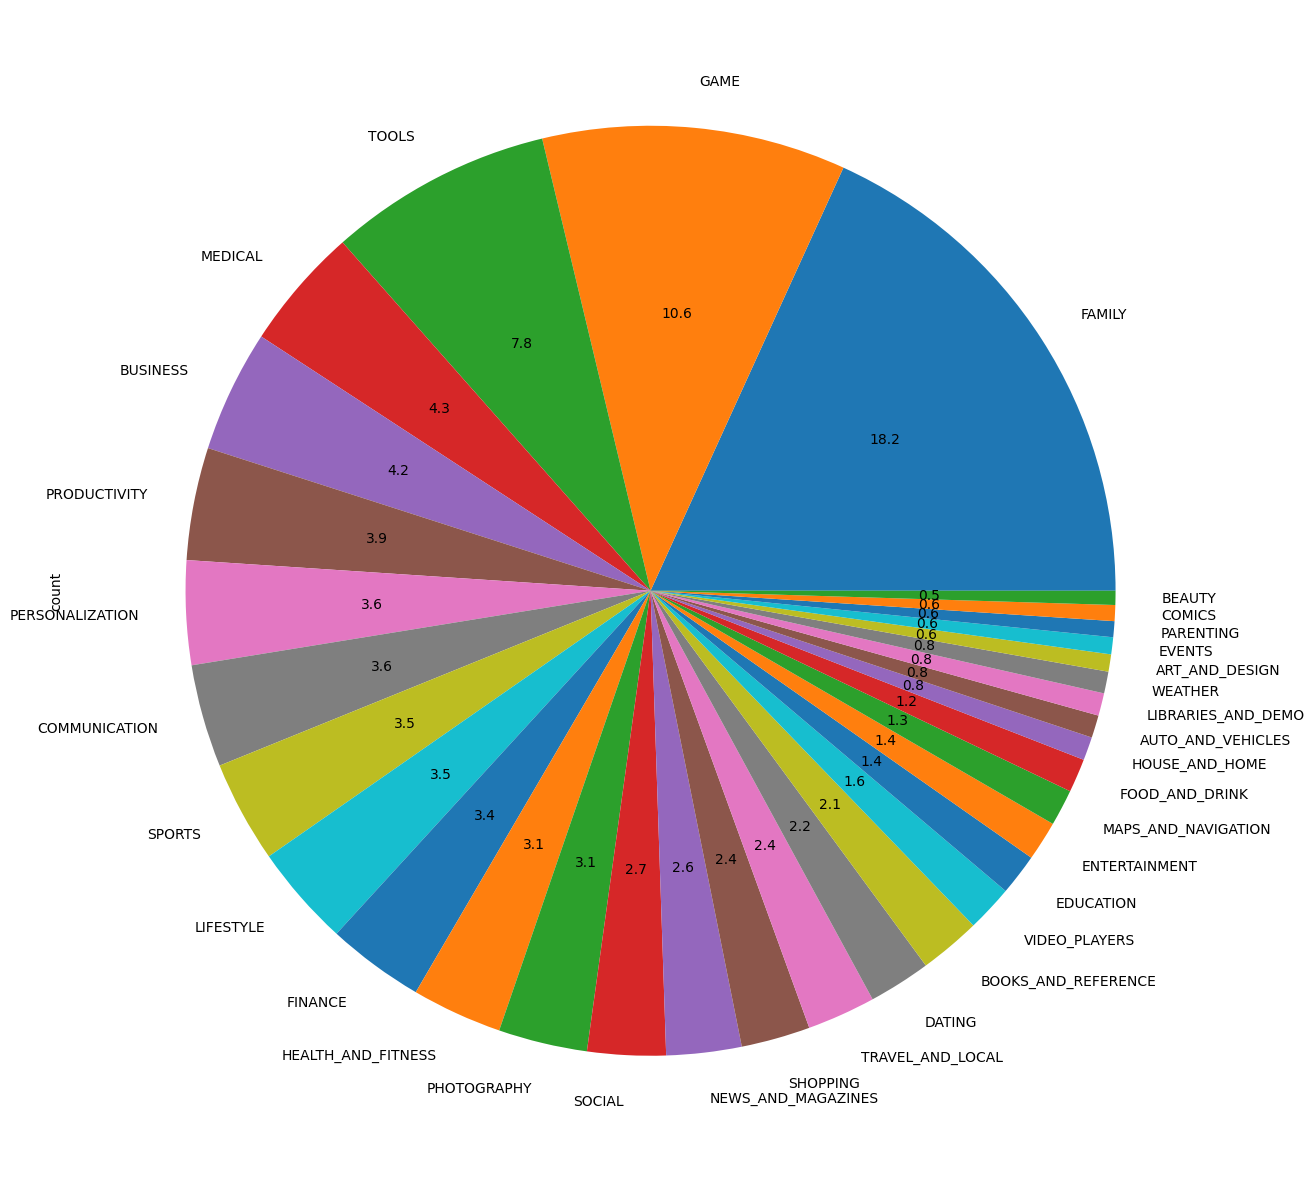

In [89]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,16),autopct='%1.1f')

#### Q4 : Top 10 most popular app categories

In [98]:
df_copy['Category'].value_counts().head(10)

Category
FAMILY             1972
GAME               1144
TOOLS               843
MEDICAL             463
BUSINESS            460
PRODUCTIVITY        424
PERSONALIZATION     392
COMMUNICATION       387
SPORTS              384
LIFESTYLE           382
Name: count, dtype: int64

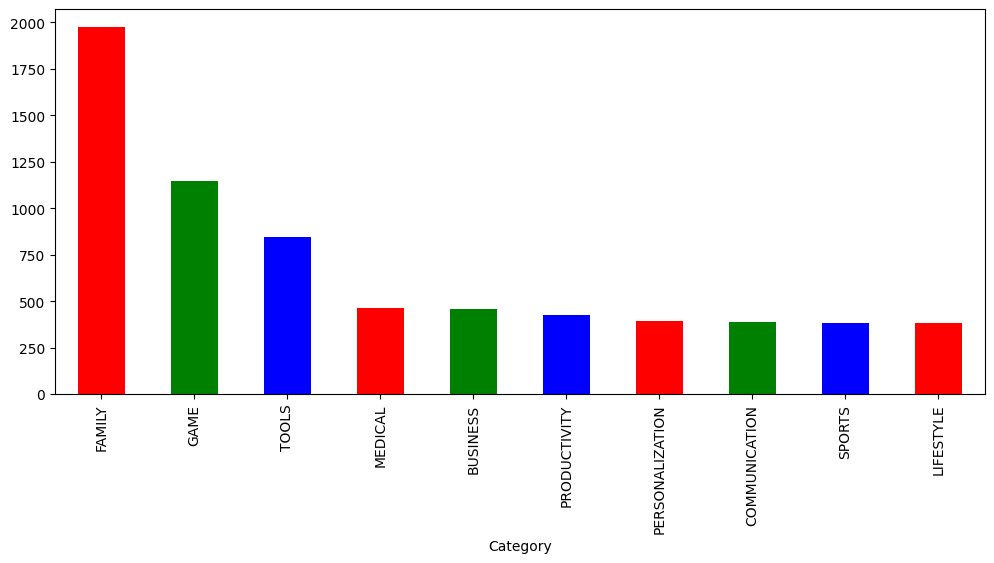

In [109]:
df_copy['Category'].value_counts().head(10).plot.bar(figsize=(12,5),color=['red','green','blue'])
plt.show()